# Library

In [1]:
## For loading the pickle
import pandas as pd
## Numpy for the heatmap
import numpy as np
## Displaying the heatmap
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data Spawn

In [314]:
spawn_region = 100
## Read the dataframe
df = pd.read_pickle("../../data/ufficial/pickle/kills.pkl")\
                    .dropna(how='any',axis=0)
## Taking only the values we need
data_us = df[((df.x_death > -spawn_region) 
              & (df.x_death < spawn_region)) 
              & ((df.z_death > -spawn_region) 
              & (df.z_death < spawn_region))]
## Values we want
#[["x_death", "z_death"]]

Text(0, 0.5, 'z')

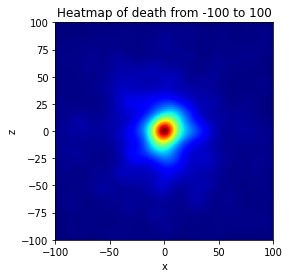

In [3]:
data = np.vstack([data_us["x_death"].values, data_us["z_death"].values])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(spawn_region, -spawn_region, 100)
ygrid = np.linspace(spawn_region, -spawn_region, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower',
           extent=[-spawn_region, spawn_region, -spawn_region, spawn_region],
           cmap=plt.cm.jet)
## informations
plt.title('Heatmap of death from -100 to 100')
plt.xlabel('x')
plt.ylabel('z')

# Data World
## Y Death

In [243]:
## Print it 
for value, perc in (df.y_death.value_counts(normalize=True) * 100).items():
    print("Y: %f Perc: %s %%" % (value, round(perc, 3)))

Y: 120.000000 Perc: 8.259 %
Y: 63.000000 Perc: 7.814 %
Y: 64.000000 Perc: 7.453 %
Y: 121.000000 Perc: 3.201 %
Y: 65.000000 Perc: 2.992 %
Y: 67.000000 Perc: 2.712 %
Y: 70.000000 Perc: 2.627 %
Y: 68.000000 Perc: 2.558 %
Y: 62.000000 Perc: 2.488 %
Y: 71.000000 Perc: 2.385 %
Y: 69.000000 Perc: 2.332 %
Y: 66.000000 Perc: 2.068 %
Y: 5.000000 Perc: 1.948 %
Y: 4.000000 Perc: 1.897 %
Y: 61.000000 Perc: 1.846 %
Y: 72.000000 Perc: 1.77 %
Y: 119.000000 Perc: 1.591 %
Y: 73.000000 Perc: 1.287 %
Y: 74.000000 Perc: 1.279 %
Y: 256.000000 Perc: 1.228 %
Y: 79.000000 Perc: 1.099 %
Y: 59.000000 Perc: 1.089 %
Y: 60.000000 Perc: 1.028 %
Y: 3.000000 Perc: 0.973 %
Y: 75.000000 Perc: 0.855 %
Y: 115.000000 Perc: 0.848 %
Y: 76.000000 Perc: 0.815 %
Y: 80.000000 Perc: 0.762 %
Y: 2.000000 Perc: 0.76 %
Y: 78.000000 Perc: 0.709 %
Y: 58.000000 Perc: 0.684 %
Y: 81.000000 Perc: 0.656 %
Y: 77.000000 Perc: 0.58 %
Y: 56.000000 Perc: 0.532 %
Y: 6.000000 Perc: 0.525 %
Y: 118.000000 Perc: 0.519 %
Y: 83.000000 Perc: 0.464 %
Y: 

## Top 5 y

In [319]:
## Algo for creating the graph
def createGraph(values):
    ## Take first 5 y
    top5 = (values.value_counts(normalize=True) * 100)[:5].round(3)
    ## Use this style for the plot
    plt.style.use("ggplot")
    ## Incr the size
    plt.figure(figsize=(15,7))
    ## Put it on the graph
    plt.barh(top5.index.astype(str), top5.values)
    ## Order it
    plt.gca().invert_yaxis()

    ## Add %
    for index, value in enumerate(top5):
        plt.text(value, index, " %" + str(value) )

    ## Show
    plt.show()

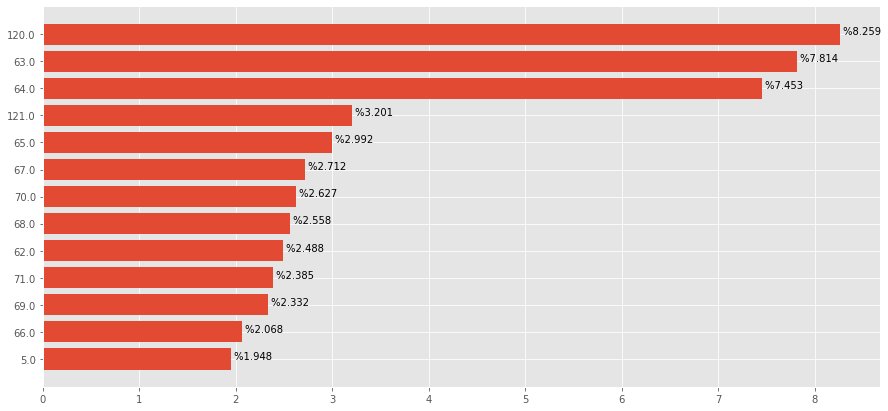

In [320]:
## Take first 5 y
createGraph(df.y_death)

## Lowest and Highest Y, X and Z

In [245]:
print("X: Min: %f Max: %f\n" \
      "Y: Min: %f Max: %f\n" \
      "Z: Min: %f Max: %f" % 
      (df.x_death.min(), df.x_death.max(),
       df.y_death.min(), df.y_death.max(),
       df.z_death.min(), df.z_death.max()))


X: Min: -1436979.000000 Max: 1378589.000000
Y: Min: -955.000000 Max: 299.000000
Z: Min: -15015074.000000 Max: 1439409.000000


## Most kills + Death

In [316]:
total_kills = len(df["killer_uuid"])

In [332]:
killers = df["killer_uuid"].value_counts(normalize=True)
victims = df["victim_uuid"].value_counts(normalize=True)
items = df["weapon"].value_counts(normalize=True)

In [336]:
killers

d7d7984f-fbf1-487c-86d9-c35734b2b938    0.042986
d1fc6d70-5fcc-4bd1-818e-fde12ebecf8f    0.029818
f6fabfae-fc2b-419d-9131-aa6a5d43e830    0.023213
905a355a-2cf0-47c6-8f13-6507c4827c8b    0.018021
02519c54-002e-4818-8bbd-5945be669f37    0.016186
                                          ...   
060d5321-1631-4196-8d33-51329adc6e5e    0.000021
83f4a369-86ae-4331-8d88-32a4a596563d    0.000021
57f6d422-4ed4-4fb9-b9e7-48609f66c3d7    0.000021
7926a6bb-a5c9-47c7-a88d-ce3b29c2e4eb    0.000021
b65be238-307e-410c-870c-7bf6df9f2f8a    0.000021
Name: killer_uuid, Length: 6174, dtype: float64

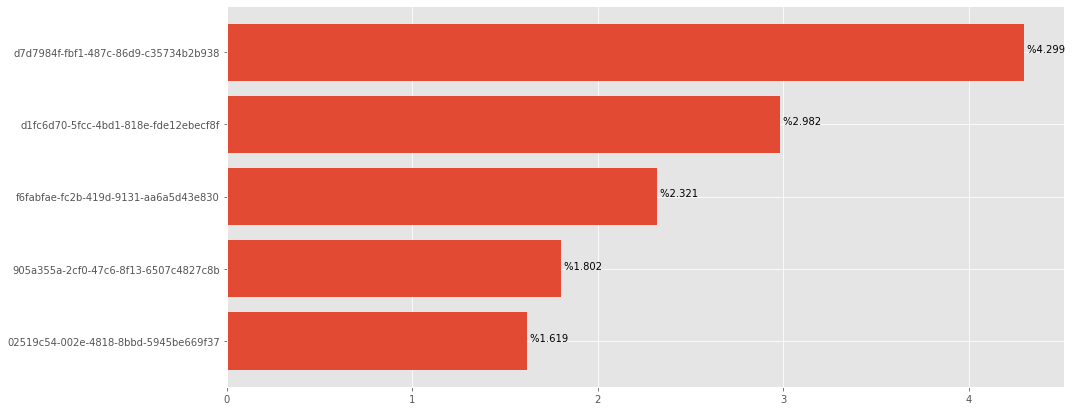

In [337]:
## Take first 5 y
top5 = (killers * 100)[:5].round(3)
## Use this style for the plot
plt.style.use("ggplot")
## Incr the size
plt.figure(figsize=(15,7))
## Put it on the graph
plt.barh(top5.index.astype(str), top5.values)
## Order it
plt.gca().invert_yaxis()

## Add %
for index, value in enumerate(top5):
    plt.text(value, index, " %" + str(value) )

## Show
plt.show()